In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")

order_products_train = pd.concat([pd.read_csv("order_products__train.csv"),pd.read_csv('order_products__prior.csv')],axis=0)
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")

In [ ]:
departments.head()

In [ ]:
aisles.head()

In [10]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [12]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [11]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


products.aisle_id > aisles.aisle_id

products.department_id > departments.department_id

order_products_train.order_id > orders.order_id

In [3]:
combined = pd.merge(order_products_train,orders,how="inner",left_on="order_id",right_on="order_id")
combined = pd.merge(products,combined,how="inner",left_on="product_id",right_on="product_id")
combined = pd.merge(aisles,combined,how="inner",left_on="aisle_id",right_on="aisle_id")
combined = pd.merge(departments,combined,how="inner",left_on="department_id",right_on="department_id")
combined.columns

Index(['department_id', 'department', 'aisle_id', 'aisle', 'product_id',
       'product_name', 'order_id', 'add_to_cart_order', 'reordered', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')

In [4]:
combined.shape,order_products_train.shape

((33819106, 15), (33819106, 4))

In [ ]:
#should be 1
combined.groupby(['order_id','product_id']).count().max()

In [ ]:
missing = combined.isnull().sum().reset_index()
missing['Missing %'] = missing.iloc[:,1]/combined.shape[0]*100
missing.columns = ['Attribute Name','Missing Count','Missing %']
missing

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
combined.describe()

In [ ]:
#should be equal
print(combined.groupby(['order_id'])['product_id'].count().max())
print(combined['add_to_cart_order'].max())

In [ ]:
combined[combined['reordered'] ==1].groupby(['user_id'])['reordered'].count().describe()


In [5]:
combined.groupby(['user_id'])['reordered'].count().describe()

count    206209.000000
mean        164.004025
std         206.014923
min           3.000000
25%          44.000000
50%          90.000000
75%         196.000000
max        3725.000000
Name: reordered, dtype: float64

In [24]:
combined[combined.user_id == 27465]

,department_id,department,aisle_id,aisle,product_id,product_name,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
22718,1,frozen,34,frozen meat seafood,15374,Homestyle Turkey Meatballs,3319463,1,0,27465,prior,1,6,18,NaN
814638,1,frozen,38,frozen meals,30162,Teriyaki & Pineapple Chicken Meatballs,200620,1,1,27465,prior,3,4,11,18.0
815072,1,frozen,38,frozen meals,30162,Teriyaki & Pineapple Chicken Meatballs,1054218,1,0,27465,prior,2,0,2,29.0


In [22]:
c = combined.user_id.value_counts()
combined[combined.user_id.isin(c.index[c.eq(3)])]

,department_id,department,aisle_id,aisle,product_id,product_name,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
22718,1,frozen,34,frozen meat seafood,15374,Homestyle Turkey Meatballs,3319463,1,0,27465,prior,1,6,18,NaN
582535,1,frozen,37,ice cream ice,48238,Gotta Do Chocolate Ice Cream,817344,1,1,96613,prior,2,1,19,7.0
582615,1,frozen,37,ice cream ice,48238,Gotta Do Chocolate Ice Cream,1690237,1,0,96613,prior,1,1,16,NaN
582728,1,frozen,37,ice cream ice,48238,Gotta Do Chocolate Ice Cream,3107558,1,1,96613,prior,3,1,19,0.0
693510,1,frozen,38,frozen meals,13277,Microwaveable Hamburgers,962851,1,1,142997,prior,2,0,13,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33122486,20,deli,67,fresh dips tapenades,21986,Artichoke Parmesan Dip,214345,1,0,112788,prior,1,3,9,NaN
33266062,20,deli,67,fresh dips tapenades,38883,Artichoke And Jalapeño Dip & Spread,1076322,1,0,112788,prior,2,4,8,30.0
33266503,20,deli,67,fresh dips tapenades,38883,Artichoke And Jalapeño Dip & Spread,3059171,1,1,112788,prior,3,3,14,27.0
33526575,20,deli,96,lunch meat,25017,Organic Turkey Breast,467115,1,0,188692,prior,1,1,8,NaN


In [32]:
combined[combined.user_id.isin(c.index[c.eq(3725)])].max()

department_id                                            21
department                                           snacks
aisle_id                                                130
aisle                                                yogurt
product_id                                            49451
product_name              Yogurt, Strained Low-Fat, Coconut
order_id                                            3408792
add_to_cart_order                                        98
reordered                                                 1
user_id                                              201268
eval_set                                              prior
order_number                                             99
order_dow                                                 6
order_hour_of_day                                        23
days_since_prior_order                                 11.0
dtype: object

In [13]:
len(combined.user_id.unique())

206209

In [ ]:
import matplotlib.pyplot as plt
plt.hist(combined['order_hour_of_day'],bins=24)
plt.ylabel("Count")
plt.xlabel("Hour of day")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.hist(combined['order_dow'].astype(int),bins=7)
plt.ylabel("Count")
plt.xlabel("Day of week")
plt.show()

In [ ]:
combined.groupby(['user_id'])['reordered'].count().values

In [ ]:
import matplotlib.pyplot as plt
plt.hist(combined.groupby(['user_id'])['reordered'].count().values)
plt.ylabel("Count")
plt.xlabel("Total products ordered per user")
plt.yscale("log")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
plt.hist(combined[combined['reordered']==1].groupby(['user_id'])['reordered'].count().values)
plt.ylabel("Count")
plt.xlabel("Total reordered products ordered per user")
plt.yscale("log")
plt.show()


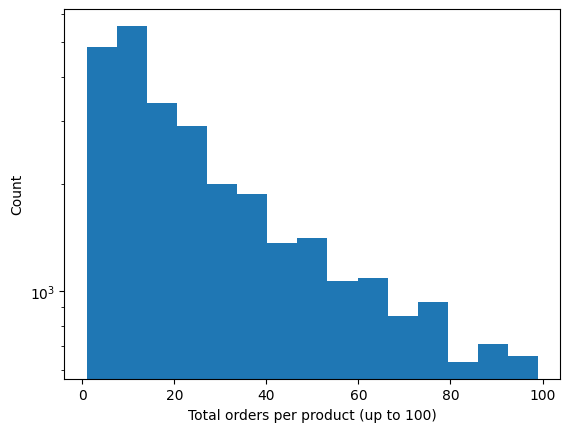

In [42]:
import matplotlib.pyplot as plt
a = combined.groupby(['product_id'])['reordered'].count().values
b = a[a<100]
plt.hist(b,bins=15)
plt.ylabel("Count")
plt.xlabel("Total orders per product (up to 100)")
plt.yscale("log")
plt.show()


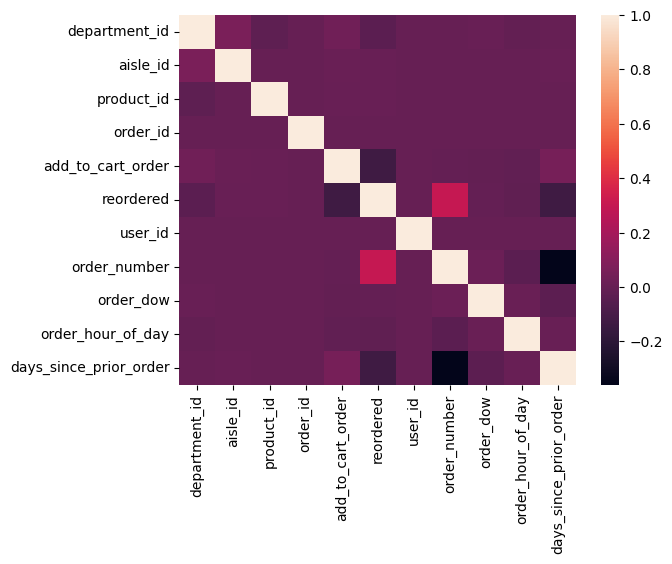

In [6]:
combined_numeric = combined.drop(['aisle', 'department', 'eval_set', 'product_name'], axis=1)
corr = combined_numeric.corr()
sns.heatmap(corr)
plt.show()

In [7]:
def g(df):
    corr = df.corr()
    corr_triu = corr.where(~np.tril(np.ones(corr.shape)).astype(bool))
    corr_triu = corr_triu.stack()
    corr_triu.name = 'correlation'
    corr_triu.index.names = ['feature_1', 'feature_2']
    corr_triu = corr_triu.to_frame()
    corr_triu = corr_triu.reset_index()
    corr_triu = corr_triu[corr_triu['correlation'].abs() > 0.5]
    corr_triu = corr_triu[['feature_1', 'feature_2']]
    corr_triu = corr_triu.values.tolist()
    return corr_triu

In [8]:
print(g(corr.copy()))

[['reordered', 'order_number'], ['order_number', 'days_since_prior_order']]


In [9]:
print(corr['reordered']['order_number'])
print(corr['order_number']['days_since_prior_order'])
print(corr['reordered']['add_to_cart_order'])
print(corr['reordered']['days_since_prior_order'])

0.3036100251785685
-0.35863616148114136
-0.13353590972543117
-0.13470761641079732


In [ ]:
print('hello')